##  🛍️ Project Introduction

Understanding customer behavior is crucial for retail businesses aiming to improve marketing strategies and customer satisfaction. This project focuses on customer segmentation using K-Means clustering, an unsupervised learning algorithm that groups customers based on similarities in their purchasing behavior.

By implementing *K-Means* from scratch, this project explores how customers can be divided into meaningful segments without predefined labels. The resulting clusters provide valuable insights that can help retailers personalize offers, optimize resources, and make data-driven business decisions.

# 1.Load the data and make sure it's clean 
(Garbage in->Garbage out)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

customer_data=pd.read_csv("data/Mall_Customers.csv")
customer_data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
customer_data.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

Since all of them are 0,no need for data cleaning or processing <br>
Let's look at the data and see how it's distributed.

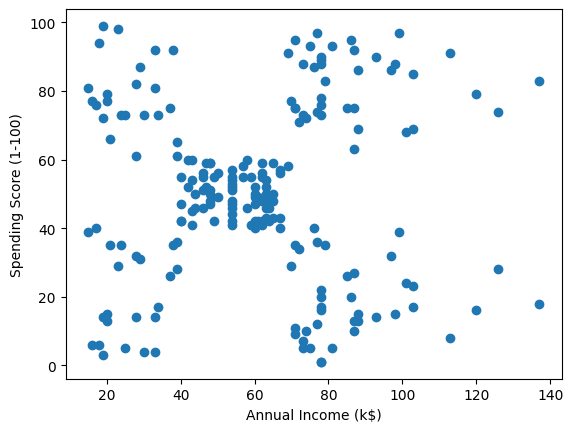

In [22]:
plt.scatter(customer_data['Annual_Income_(k$)'], customer_data['Spending_Score'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

Now,clustering is needed.

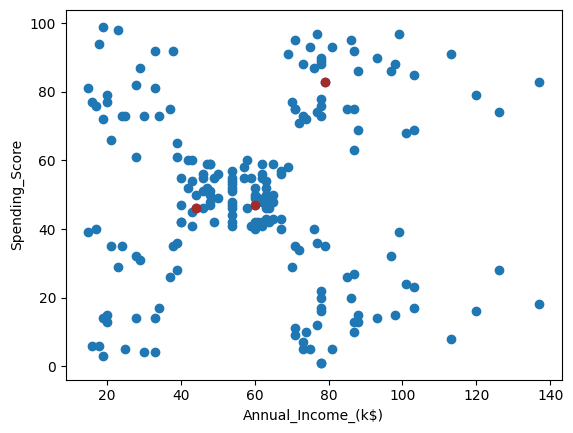

In [23]:
K=3
centroids=customer_data.sample(n=K)
plt.scatter(customer_data['Annual_Income_(k$)'],customer_data['Spending_Score'])#for data points
plt.scatter(centroids['Annual_Income_(k$)'],centroids['Spending_Score'] ,c='brown') #for centroids
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

Next, we will iterate through each centroid and data point, calculate the distance between them, find the K clusters and assign the data points to a significant cluster. This process will continue until the difference between previously defined centroids and current centroids is zero:

# First,Values of Genre 

In [24]:
customer_data['Genre']

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Genre, Length: 200, dtype: object

We can notice that it only has 2 values,male and female,so we can encode  it easily using:

In [25]:
customer_data=pd.get_dummies(customer_data, columns=['Genre'], drop_first=True)
#turn categorical data into numerical data



In [26]:
customer_data.head()

,CustomerID,Age,Annual_Income_(k$),Spending_Score,Genre_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False


#### Identify Non-Centroids:
This part identifies the data points (customers) that are not currently centroids. customer_data contains all customers, while centroids contains the current centroid points. The mask is used to exclude centroids from the dataset X.

In [27]:
mask=customer_data['CustomerID'].isin(centroids['CustomerID'])
print(mask.head())
X=customer_data[~mask]
X.head()


0    False
1    False
2    False
3    False
4    False
Name: CustomerID, dtype: bool


,CustomerID,Age,Annual_Income_(k$),Spending_Score,Genre_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False


##### Cluster Loop:

In [28]:
diff = 1
j=0
XD=X
while(diff!=0):
   i=1
   #For each centroid, the Euclidean distance between the centroid and every data point is calculated. 
   # This distance is stored in the DataFrame XD.
   for index1,row_c in centroids.iterrows():
       ED=[]
       for index2,row_d in XD.iterrows():
           #calculate the distance between two pointsrow c and row d for two features annual income and spending score
           d1=(row_c['Annual_Income_(k$)'] - row_d['Annual_Income_(k$)'] )**2 #fill x1 and y1 with the correct values
           d2=(row_c['Spending_Score'] - row_d['Spending_Score'] )**2 #fill x2 and y2 with the correct values
           d=np.sqrt(d1+d2)
           ED.append(d)
       X[i]=ED
       i=i+1
   #Assign Clusters
   #Each data point is assigned to the nearest centroid (cluster) by finding the minimum distance.
   C=[]
   for index,row in X.iterrows():
       min_dist=row[1]
       pos=1
       for i in range(K):
           if row[i+1] < min_dist:
               min_dist = row[i+1]
               pos=i+1
       C.append(pos)
   X["Cluster"]=C
   print(X)
   
   #Update Centroids
   #The new centroids are calculated as the mean of the points in each cluster. 
   # If it's the first iteration, diff is set to 1 to ensure the loop continues. 
   # Otherwise, diff is updated based on the change in centroid positions.
   try:
    centroids_new = X.groupby(["Cluster"]).mean()[["Spending_Score","Annual_Income_(k$)"]]
   except Exception as e:
       print(f'error : {str(e)}')
       
   #check for convergence
   #The loop continues until the centroids no longer change significantly, indicating that the algorithm has converged.
   if j == 0:
       diff=1
       j=j+1
   else:
       diff = (centroids_new['Spending_Score'] - centroids['Spending_Score']).sum() + (centroids_new['Annual_Income_(k$)'] - centroids['Annual_Income_(k$)']).sum()
   centroids = X.groupby(["Cluster"]).mean()[["Spending_Score","Annual_Income_(k$)"]]

C:\Users\USER\AppData\Local\Temp\ipykernel_9244\2922550667.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\USER\AppData\Local\Temp\ipykernel_9244\2922550667.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\USER\AppData\Local\Temp\ipykernel_9244\2922550667.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

     CustomerID  Age  Annual_Income_(k$)  Spending_Score  Genre_Male  \
0             1   19                  15              39        True   
1             2   21                  15              81        True   
2             3   20                  16               6       False   
3             4   23                  16              77       False   
4             5   31                  17              40       False   
..          ...  ...                 ...             ...         ...   
195         196   35                 120              79       False   
196         197   45                 126              28       False   
197         198   32                 126              74        True   
198         199   32                 137              18        True   
199         200   30                 137              83        True   

              1          2          3  Cluster  
0     29.832868  45.705580  77.665951        1  
1     45.453273  56.400355  64.031242

C:\Users\USER\AppData\Local\Temp\ipykernel_9244\2922550667.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\USER\AppData\Local\Temp\ipykernel_9244\2922550667.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
C:\Users\USER\AppData\Local\Temp\ipykernel_9244\2922550667.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

     CustomerID  Age  Annual_Income_(k$)  Spending_Score  Genre_Male  \
0             1   19                  15              39        True   
1             2   21                  15              81        True   
2             3   20                  16               6       False   
3             4   23                  16              77       False   
4             5   31                  17              40       False   
..          ...  ...                 ...             ...         ...   
195         196   35                 120              79       False   
196         197   45                 126              28       False   
197         198   32                 126              74        True   
198         199   32                 137              18        True   
199         200   30                 137              83        True   

              1          2           3  Cluster  
0     20.892257  57.174836   81.768824        1  
1     36.756246  72.852090   69.193

C:\Users\USER\AppData\Local\Temp\ipykernel_9244\2922550667.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
C:\Users\USER\AppData\Local\Temp\ipykernel_9244\2922550667.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


     CustomerID  Age  Annual_Income_(k$)  Spending_Score  Genre_Male  \
0             1   19                  15              39        True   
1             2   21                  15              81        True   
2             3   20                  16               6       False   
3             4   23                  16              77       False   
4             5   31                  17              40       False   
..          ...  ...                 ...             ...         ...   
195         196   35                 120              79       False   
196         197   45                 126              28       False   
197         198   32                 126              74        True   
198         199   32                 137              18        True   
199         200   30                 137              83        True   

              1          2           3  Cluster  
0     24.197754  59.890662   83.691327        1  
1     36.939563  76.458691   71.745

C:\Users\USER\AppData\Local\Temp\ipykernel_9244\2922550667.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
C:\Users\USER\AppData\Local\Temp\ipykernel_9244\2922550667.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


     CustomerID  Age  Annual_Income_(k$)  Spending_Score  Genre_Male  \
0             1   19                  15              39        True   
1             2   21                  15              81        True   
2             3   20                  16               6       False   
3             4   23                  16              77       False   
4             5   31                  17              40       False   
..          ...  ...                 ...             ...         ...   
195         196   35                 120              79       False   
196         197   45                 126              28       False   
197         198   32                 126              74        True   
198         199   32                 137              18        True   
199         200   30                 137              83        True   

              1          2           3  Cluster  
0     25.511317  61.893682   83.691327        1  
1     38.008860  78.881920   71.745

C:\Users\USER\AppData\Local\Temp\ipykernel_9244\2922550667.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
C:\Users\USER\AppData\Local\Temp\ipykernel_9244\2922550667.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


     CustomerID  Age  Annual_Income_(k$)  Spending_Score  Genre_Male  \
0             1   19                  15              39        True   
1             2   21                  15              81        True   
2             3   20                  16               6       False   
3             4   23                  16              77       False   
4             5   31                  17              40       False   
..          ...  ...                 ...             ...         ...   
195         196   35                 120              79       False   
196         197   45                 126              28       False   
197         198   32                 126              74        True   
198         199   32                 137              18        True   
199         200   30                 137              83        True   

              1          2           3  Cluster  
0     27.286061  64.269928   83.691327        1  
1     39.074700  82.184084   71.745

C:\Users\USER\AppData\Local\Temp\ipykernel_9244\2922550667.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
C:\Users\USER\AppData\Local\Temp\ipykernel_9244\2922550667.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


     CustomerID  Age  Annual_Income_(k$)  Spending_Score  Genre_Male  \
0             1   19                  15              39        True   
1             2   21                  15              81        True   
2             3   20                  16               6       False   
3             4   23                  16              77       False   
4             5   31                  17              40       False   
..          ...  ...                 ...             ...         ...   
195         196   35                 120              79       False   
196         197   45                 126              28       False   
197         198   32                 126              74        True   
198         199   32                 137              18        True   
199         200   30                 137              83        True   

              1          2           3  Cluster  
0     28.829535  67.530123   82.983681        1  
1     40.279886  86.613882   71.283

C:\Users\USER\AppData\Local\Temp\ipykernel_9244\2922550667.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


     CustomerID  Age  Annual_Income_(k$)  Spending_Score  Genre_Male  \
0             1   19                  15              39        True   
1             2   21                  15              81        True   
2             3   20                  16               6       False   
3             4   23                  16              77       False   
4             5   31                  17              40       False   
..          ...  ...                 ...             ...         ...   
195         196   35                 120              79       False   
196         197   45                 126              28       False   
197         198   32                 126              74        True   
198         199   32                 137              18        True   
199         200   30                 137              83        True   

             1          2           3  Cluster  
0    30.402018  72.289906   83.691327        1  
1    41.849249  92.270420   71.745356

C:\Users\USER\AppData\Local\Temp\ipykernel_9244\2922550667.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


     CustomerID  Age  Annual_Income_(k$)  Spending_Score  Genre_Male  \
0             1   19                  15              39        True   
1             2   21                  15              81        True   
2             3   20                  16               6       False   
3             4   23                  16              77       False   
4             5   31                  17              40       False   
..          ...  ...                 ...             ...         ...   
195         196   35                 120              79       False   
196         197   45                 126              28       False   
197         198   32                 126              74        True   
198         199   32                 137              18        True   
199         200   30                 137              83        True   

             1          2           3  Cluster  
0    30.998493  74.825614   83.691327        1  
1    42.551446  95.256601   71.745356

C:\Users\USER\AppData\Local\Temp\ipykernel_9244\2922550667.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


Now,let's visualize clustering of data points.

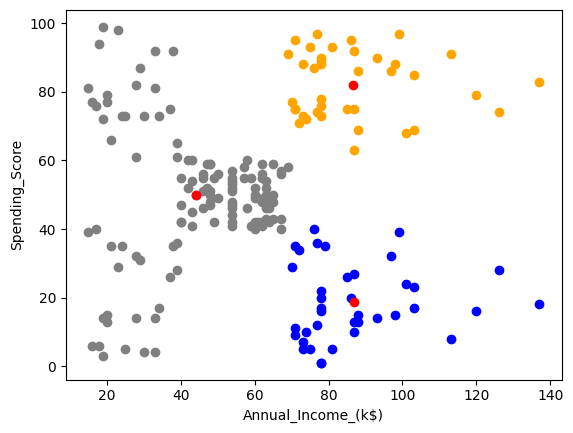

In [29]:
color=['grey','blue','orange']
for k in range(K):
    data=X[X['Cluster']==k+1]
    plt.scatter(data['Annual_Income_(k$)'],data['Spending_Score'],color=color[k])
plt.scatter(centroids['Annual_Income_(k$)'],centroids['Spending_Score'],color='red')
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()


### Let's simplify the code by using KMeans Model 

In [30]:
from sklearn.cluster import KMeans
km_sample=KMeans(n_clusters=3)
km_sample.fit(customer_data[['Annual_Income_(k$)','Spending_Score']])

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",None
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


Use seaborn to display a heatmap of the results 

<Axes: xlabel='Annual_Income_(k$)', ylabel='Spending_Score'>

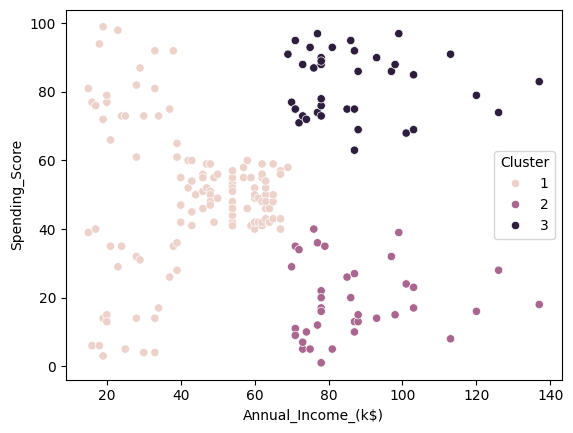

In [31]:
import seaborn as sns
labels_sample=km_sample.labels_
customer_data['label']=labels_sample
sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score', hue='Cluster', data=X)


In [32]:
labels_sample

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

### How to choose K?
Some factors can challenge the efficacy of the final output of the K-means clustering algorithm and one of them is finalizing the number of clusters(K). Selecting a lower number of clusters will result in underfitting while specifying a higher number of clusters can result in overfitting. Unfortunately, there is no definitive way to find the optimal number. 

The optimal number of clusters depends on the similarity measures and the parameters used for clustering. So, to find the number of clusters in the data, we need to run the k-means clustering for a range of values and compare the outcomes. At present, we don’t have any method to determine the exact accurate value of clusters K but we can estimate the value using some techniques, including Cross-validation, Elbow method, Information Criteria, the Silhouette method, and the G-means algorithm. 

###  The elbow method
“The elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.” [Resource]( https://en.wikipedia.org/wiki/Elbow_method_(clustering)  )

#### Perform K-means clustering with all the K values. For each K value, we compute the average distance to the centroid across all the data points:

In [33]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
#creating sample data
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])#annual income
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])#spendiong score 
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
#elbow method to find the optimal number of clusters
distortions = []
K = range(1,10)
for k in K:
   kmeanModel = KMeans(n_clusters=k).fit(X)
   kmeanModel.fit(X)
   distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])


In [34]:
X

array([[3, 5],
       [1, 4],
       [1, 5],
       [2, 6],
       [1, 5],
       [6, 8],
       [6, 6],
       [6, 7],
       [5, 6],
       [6, 7],
       [7, 1],
       [8, 2],
       [9, 1],
       [8, 2],
       [9, 3],
       [9, 2],
       [8, 3]])

In [35]:
distortions

[np.float64(3.4577032384495707),
 np.float64(1.7687413573405673),
 np.float64(0.8819889697423957),
 np.float64(0.7993479948778336),
 np.float64(0.7239442260134706),
 np.float64(0.6001210828155252),
 np.float64(0.4969084160630048),
 np.float64(0.43613020955135845),
 np.float64(0.35294117647058826)]

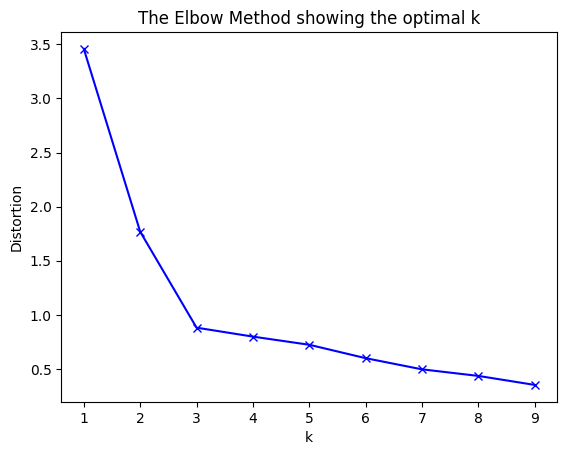

In [36]:
#Plot the elbow to ifnd out the perfect k
plt.plot(K, distortions , 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Silhouette method
Finding an Elbow point is challenging in practice but there are other techniques to determine the optimal value of K and one of them is the Silhouette Score method. 

To find an optimal value for the number of clusters K, we use a silhouette plot to display a measure of how close each point in one cluster is to a point in the neighboring clusters and thus provide a way to assess parameters like the number of clusters visually. Let’s see how it works.

Compute K-means clustering algorithm for a range of values.
For each value of K, find the average silhouette score of data points:

In [37]:
from sklearn.metrics import silhouette_score
silhouette_scores = []

range_n_clusters = [2, 3, 4, 5, 6, 7, 8] 

for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=k).fit(X)
  cluster_labels = clusterer.labels_
  silhouette_scores.append(silhouette_score(X, cluster_labels,metric='euclidean'))


Plot the collection of silhouette scores for each value of K

Select the number of clusters when the silhouette score is maximum:

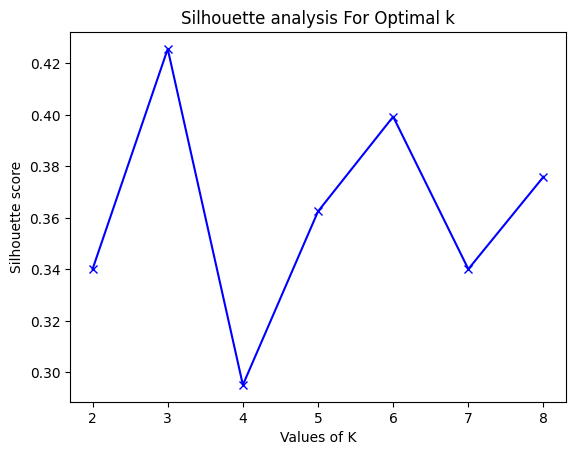

In [38]:
plt.plot(range_n_clusters,silhouette_scores,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [39]:
kmeans=KMeans(n_clusters=3).fit(X)
labels=kmeans.labels_
silhouette_scores.append(silhouette_score(X, labels, metric='euclidean'))

In [ ]:
new_data_point=np.array([[4,4]]) #annual income=4, spending score=4

new_data_cluster=kmeans.predict(new_data_point)

print(f'New data point belongs to cluster:', {new_data_cluster[0]})

New data point belongs to cluster: {np.int32(0)}
